In [5]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

print("Pandas Version:", pd.__version__)
print("Numpy Version:", np.__version__)
print("OpenCV Version:", cv2.__version__)
print("Seaborn Version:", sns.__version__)

# Here we got dependencies and it's corresponding Library Version

Pandas Version: 0.25.1
Numpy Version: 1.17.2
OpenCV Version: 4.1.0
Seaborn Version: 0.9.0


In [6]:
data_dir = '../data'
labels_csv = os.path.join(data_dir, 'gicsd_labels.csv')
images_dir = os.path.join(data_dir, 'images')
data_ids = [path for path in os.listdir(images_dir)]
data_df = pd.read_csv(labels_csv)
# assert len(data_df) != len(data_ids)
if len(data_df) != len(data_ids):
    print('#################Some datasets are missing#####################')
    
# Here concluded that length is same for labels and images.

In [7]:
not_present = []
not_present_cnt = 0
for i, row in data_df.iterrows():
    if row[0] not in data_ids:
        not_present.append(row[0])
        not_present_cnt+=1
        
print(not_present_cnt)
print(not_present)

# Here concluded that no dataset correspondance are missing

0
[]


In [8]:
def load_img_shapes(path_to_img):
    return cv2.imread(path_to_img).shape

def load_img(path_to_img):
    return cv2.imread(path_to_img)

# Helper Function to get shape of image and image itself

In [9]:
print(data_df.iloc[0])
data_df.dtypes.value_counts()

# Just a Sample in which I concluded that column name has whitespaces

IMAGE_FILENAME      GICSD_1_0_3.png
 LABEL             FULL_VISIBILITY 
Name: 0, dtype: object


object    2
dtype: int64

Text(0.5, 1.0, 'GICSD_1_0_3.png')

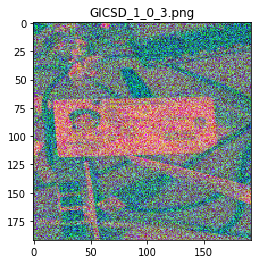

In [10]:
sample_img_id = data_df['IMAGE_FILENAME'].iloc[0]
sample_img_path = os.path.join(images_dir, sample_img_id)

# Load image
img = load_img(sample_img_path)

# Plot image
plt.imshow(img)
plt.title(sample_img_id)

In [11]:
data_df.columns = ['IMAGE_FILENAME', 'LABEL']
# Describing the dataframe
print(data_df.describe())
print('###########\n')
print(data_df.info())
print('###########\n')
# Drop missing values if exists
print(data_df.dropna())
print('###########\n')
print(data_df.dtypes.value_counts())
print('###########\n')
# Drop Duplicate filenames
print('###########\n')
print(data_df['IMAGE_FILENAME'].drop_duplicates())

           IMAGE_FILENAME              LABEL
count                 800                800
unique                800                  3
top     GICSD_2_9_273.png   FULL_VISIBILITY 
freq                    1                646
###########

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 2 columns):
IMAGE_FILENAME    800 non-null object
LABEL             800 non-null object
dtypes: object(2)
memory usage: 12.6+ KB
None
###########

         IMAGE_FILENAME                 LABEL
0       GICSD_1_0_3.png      FULL_VISIBILITY 
1      GICSD_1_0_13.png      FULL_VISIBILITY 
2      GICSD_1_1_33.png   PARTIAL_VISIBILITY 
3      GICSD_1_1_53.png      FULL_VISIBILITY 
4      GICSD_1_2_73.png      FULL_VISIBILITY 
..                  ...                   ...
795  GICSD_50_7_213.png        NO_VISIBILITY 
796  GICSD_50_7_233.png   PARTIAL_VISIBILITY 
797  GICSD_50_8_253.png      FULL_VISIBILITY 
798  GICSD_50_9_273.png      FULL_VISIBILITY 
799  GICSD_50_9_2

In [12]:
# label_map = {
#     'NO_VISIBILITY': '2',
#     'PARTIAL_VISIBILITY': '1',
#     'FULL_VISIBILITY': '0'
# }

# data_df['new_label'] = data_df[' LABEL'].map(label_map)

def rule(x):
    if x['LABEL'].strip() == 'NO_VISIBILITY':
        return '2'
    if x['LABEL'].strip() == 'PARTIAL_VISIBILITY':
        return '1'
    if x['LABEL'].strip() == 'FULL_VISIBILITY':
        return '0'
    
    return np.nan

data_df['LABEL'] = data_df.apply(rule, axis = 1)

# data_df[' LABEL'].replace(to_replace=['NO_VISIBILITY','PARTIAL_VISIBILITY','FULL_VISIBILITY'],
#                           value=['2', '1', '0'], inplace = True)

# data_df.loc[data_df[' LABEL'].isin(['NO_VISIBILITY'])]='2'
# data_df.loc[data_df[' LABEL'].isin(['PARTIAL_VISIBILITY'])]='1'
# data_df.loc[data_df[' LABEL'].isin(['FULL_VISIBILITY'])]='0'


# Concluded that the label values also has whitespaces

0    646
1    123
2     31
Name: LABEL, dtype: int64


Text(0.5, 1.0, 'Dataset')

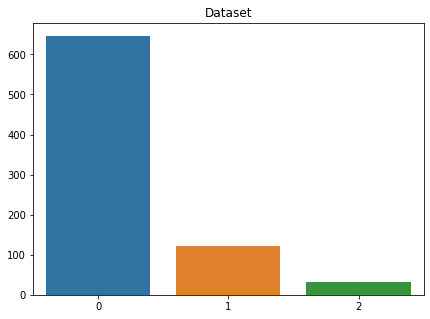

In [13]:
print(data_df['LABEL'].value_counts())

plt.figure(figsize=(7, 5))
sns.barplot(x=data_df['LABEL'].value_counts().index, y=data_df['LABEL'].value_counts().values)
plt.title("Dataset")

# Concluded that Dataset is Highly biased on FULL_VISIBILITY class

In [14]:
data_shapes = []
for i in range(len(data_ids)):
    img_id = data_ids[i]
    img_path = os.path.join(images_dir, img_id)
    data_shapes.append(load_img_shapes(img_path))
    
df_data = pd.DataFrame({'Shapes': data_shapes})
data_counts = df_data['Shapes'].value_counts()

print("Image Shapes:")
for i in range(len(data_counts)):
    print("Shape %s counts: %d" % (data_counts.index[i], data_counts.values[i]))
    
# Concluded that each image is of same shape so no need to reshape and got the length of dataset.

Image Shapes:
Shape (192, 192, 3) counts: 800


Text(0.5, 1.0, 'Dataset')

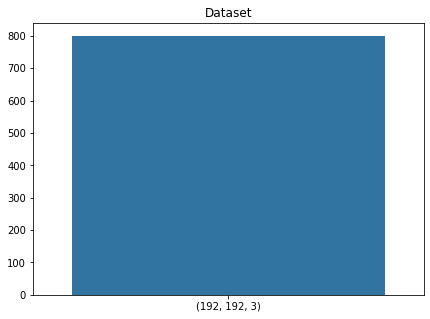

In [15]:
plt.figure(figsize=(7, 5))
sns.barplot(x=data_counts.index, y=data_counts.values)
plt.title("Dataset")

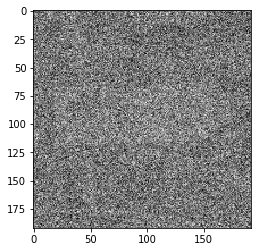

In [16]:
sample_img_id = data_df['IMAGE_FILENAME'].iloc[0]
sample_img_path = os.path.join(images_dir, sample_img_id)

# load color image 
bgr_img = load_img(sample_img_path)
# convert to grayscale
gray_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2GRAY)

# normalize, rescale entries to lie in [0,1]
gray_img = gray_img.astype("float32")/255

# plot image
plt.imshow(gray_img, cmap='gray')
plt.show()

In [ ]:
sample_img_id = data_df['IMAGE_FILENAME'].iloc[0]
sample_img_path = os.path.join(images_dir, sample_img_id)

# load color image

bgr_img = load_img(sample_img_path)

# Convert BGR to HSV
# hsv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
# hsl = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HLS) # equal to HSL
# luv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2LUV)

#RGB - Blue
cv2.imshow('B-RGB.jpg',bgr_img[:, :, 0])
cv2.imwrite('B-RGB.jpg',bgr_img[:, :, 0])

# RGB - Green
cv2.imshow('G-RGB',bgr_img[:, :, 1])
cv2.imwrite('G-RGB.jpg',bgr_img[:, :, 1])

# RGB Red
cv2.imshow('R-RGB',bgr_img[:, :, 2])
cv2.imwrite('R-RGB.jpg',bgr_img[:, :, 2])

cv2.waitKey(0)

# Concluded that important data is stored in Blue channel. So will consider only Blue channel.